### Neural Networks Overview
- In logistic regression we had:
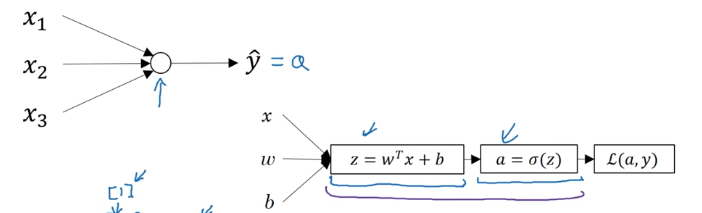

- In neural networks with one layer we will have:
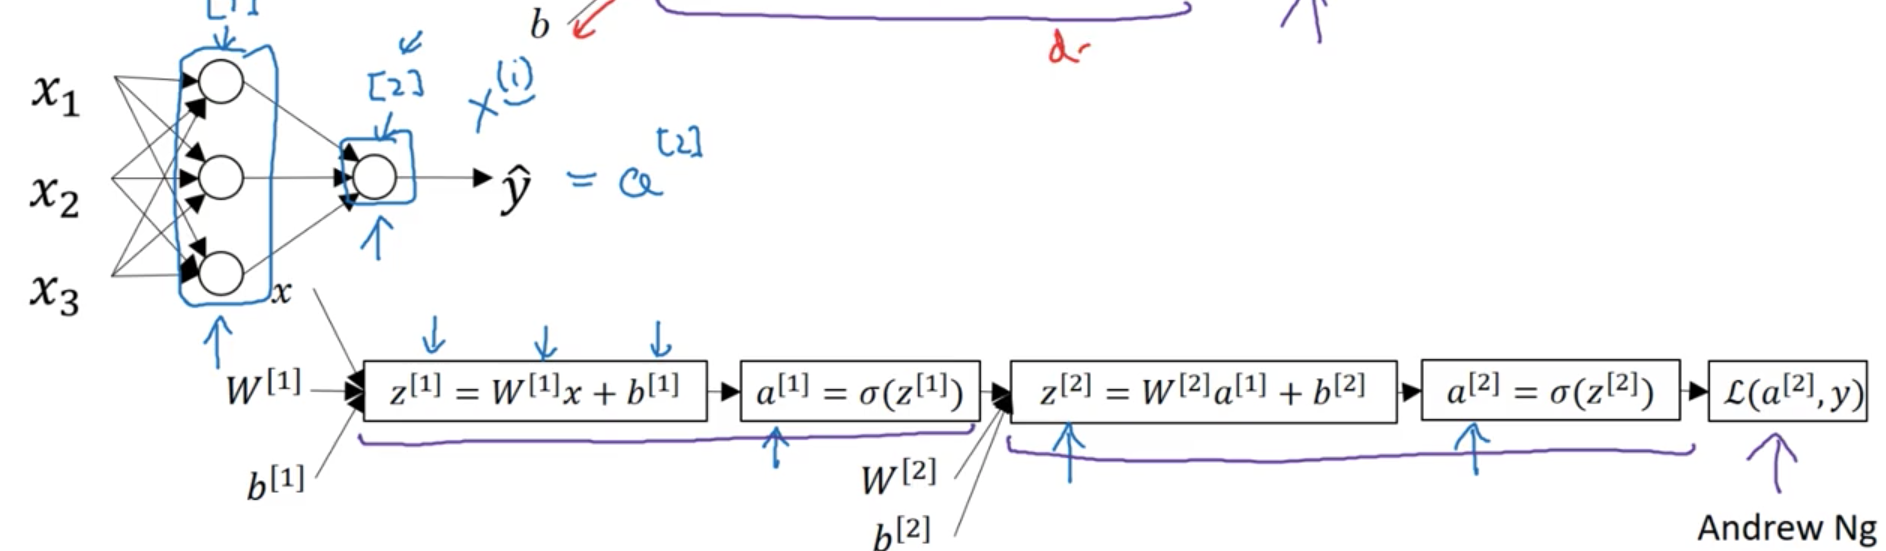

### Neutral Network Representation
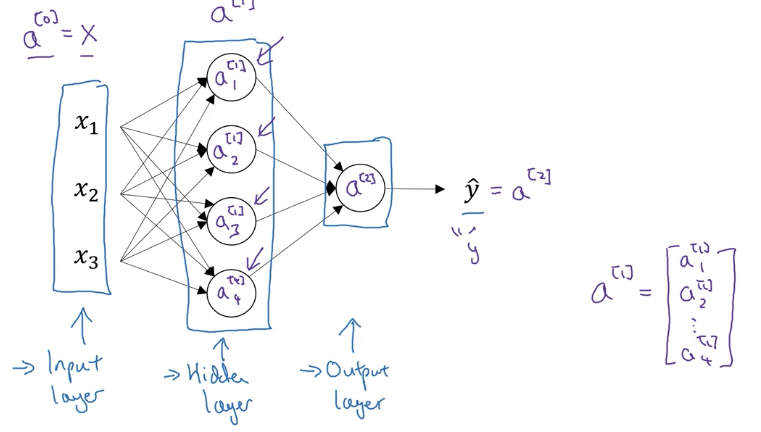

- a0 = x (the input layer)
- a1 will represent the activation of the hidden neurons.
- a2 will represent the output layer.

### Computing a Neural Network's Output

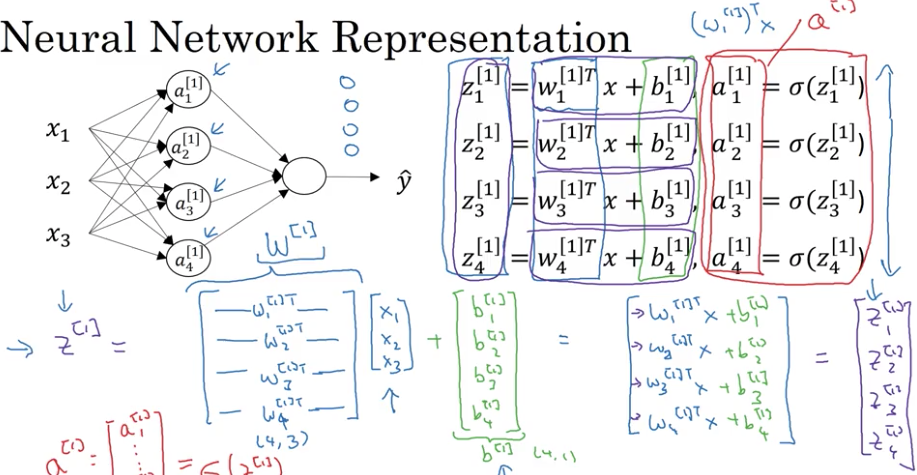

- Here are some informations about the last image:
  - noOfHiddenNeurons = 4
  - Nx = 3
  - Shapes of the variables:
    - W1 is the matrix of the first hidden layer, it has a shape of (noOfHiddenNeurons,nx)
    - b1 is the matrix of the first hidden layer, it has a shape of (noOfHiddenNeurons,1)
    - z1 is the result of the equation z1 = W1*X + b, it has a shape of (noOfHiddenNeurons,1)
    - a1 is the result of the equation a1 = sigmoid(z1), it has a shape of (noOfHiddenNeurons,1)
    - W2 is the matrix of the second hidden layer, it has a shape of (1,noOfHiddenNeurons)
    - b2 is the matrix of the second hidden layer, it has a shape of (1,1)
    - z2 is the result of the equation z2 = W2*a1 + b, it has a shape of (1,1)
    - a2 is the result of the equation a2 = sigmoid(z2), it has a shape of (1,1)

### Vectorizing across multiple examples
- Pseudo code for forward propagation for the 2 layers NN:
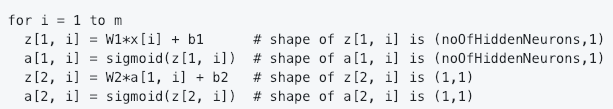

- Lets say we have X on shape (Nx,m). So the new pseudo code:
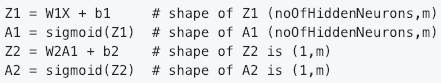

- If you notice always m is the number of columns.

### Activation functions

- So far we are using sigmoid, but in some case other function can be a lot better.
- Tanh activation function range is [-1, 1] 
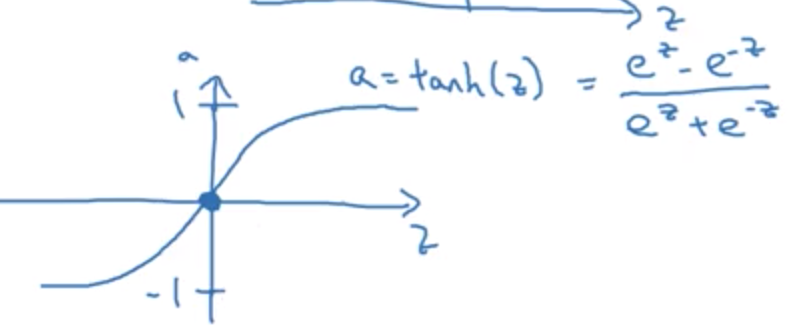

or A = np.tanh(z) # where z is the input matrix

- Sigmoid or Tanh function disadvantage is that if the input is too small or too high, the slope will be near zero which will cause us the gradient decent problem.
- So here is some basic rule for choosing activation functions, if your classification is between 0 and 1, use the output activation as sigmoid and the others as RELU.
- The advantage of both the ReLU and the leaky ReLU is that for a lot of the space of Z, the derivative of the activation function, the slope is very different from 0. 
- So using the ReLU activation function, your NN will often learn much faster than when using the tanh or the sigmoid activation function.


### Why do you need non-linear activation functions?
- Whatever hidden layers you add, the activation will be always linear like logistic regression (So its useless in a lot of complex problems)
- You might use linear activation function in one place - in the output layer if the output is real numbers (regression problem). But even in this case if the output value is non-negative you could use RELU instead.

housing price boston
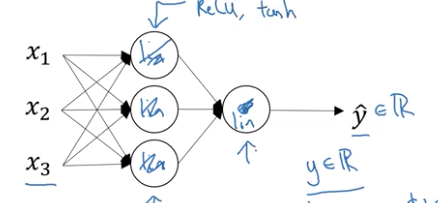

### Derivatives of activation functions
- Derivation of Sigmoid activation function:
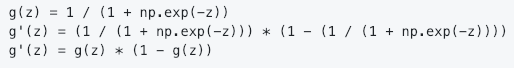

- Derivation of Tanh activation function:
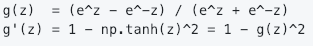

- Derivation of RELU activation function:
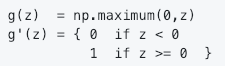

- Derivation of leaky RELU activation function:
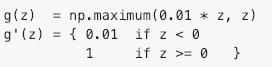

### Gradient desceent for neural networks
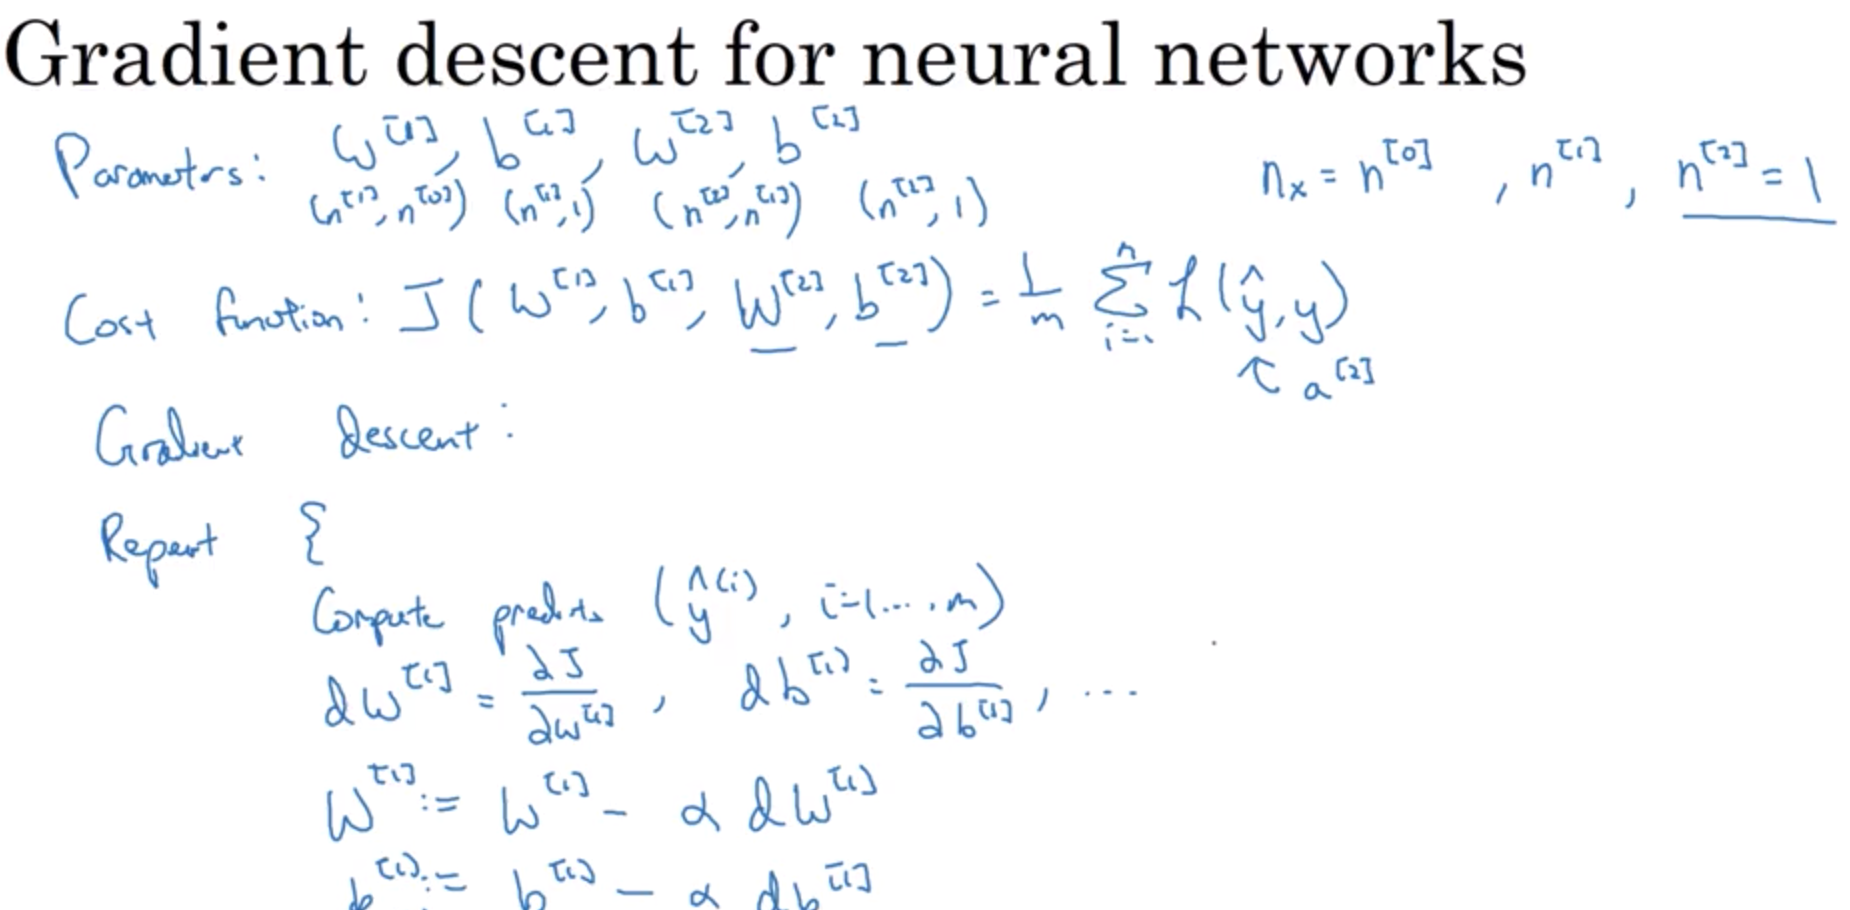
db[2] = 1/m * np.sum(dZ[2], axis =1, keepdims = True) => (n, 1)
- axis = 1: summing hozirontally
- keepdims: it prevents Python from outputting one of those funny rrank one arrays

- Forward propagation:
- Z1 = W1A0 + b1 #A0 is X
- A1 = g1(Z1)
- Z2 = W2A1 + b2
- A2 = Sigmoid(Z2) # Sigmoid because the output is between 0 and 1

- Back propagation (derivations): 
   - dZ2 = A2 - Y #derivative of cost function we used * derivative of the sigmoid function
   - dW2 = (dZ2 * A1.T) / m
   - db2 = Sum(dZ2) / m
   - dZ1 = (W2.T * dZ2) * g'1(Z1)  # element wise product (*)
   - dW1 = (dZ1 * A0.T) / m   # A0 = X
   - db1 = Sum(dZ1) / m

### Random Initialization

- In logistic regression it wasn't important to initialize the weights randomly, while in NN we have to initialize them randomly.
- If we initialize all the weights with zeros in NN it won't work (initializing bias with zero is OK):
  - all hidden units will be completely identical (symmetric) - compute exactly the same function (a1 = a2)
  - on each gradient descent iteration all the hidden units will always update the same
- To solve this we initialize the W's with a small random numbers:
    - W1 = np.random.randn((2,2)) * 0.01    # 0.01 to make it small enough
    - b1 = np.zeros((2,1))           